In [1]:
from math import pi, cos, sin, tan, atan2
import numpy as np
from matplotlib.animation import FuncAnimation
from src.plot_utils import plt, savefig

%matplotlib inline

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['lines.linewidth'] = 1

## Farkas lemma

Plot statement 1

In [3]:
def plot_cone(ax, b_x, b_y):
    """Plot cone of two vectors with another vector inside the cone"""
    # Plot 3 vectors
    ax.arrow(0, 0, 1, 2, length_includes_head=True, linewidth=1, head_width=0.2, fc='tab:red', ec='tab:red')
    ax.arrow(0, 0, -2, 3, length_includes_head=True, linewidth=1, head_width=0.2, fc='tab:red', ec='tab:red')
    ax.arrow(0, 0, b_x, b_y, length_includes_head=True, linewidth=1, head_width=0.2, fc='tab:green', ec='tab:green')
    
    # Plot vector labels
    ax.text(1.5, 2, r'$\vec{a_1}$', color='tab:red', fontsize=20, ha='center', va='center')
    ax.text(-2.5, 2.8, r'$\vec{a_2}$', color='tab:red', fontsize=20, ha='center', va='center')
    ax.text(b_x * 1.1, b_y * 1.1, r'$\vec{b}$', color='tab:green', fontsize=20, ha='center', va='center')
    
    # Plot dotted lines at cone boundaries
    ax.plot([1, 5], [2, 10], '--', lw=1, color='tab:red')
    ax.plot([-2, -5], [3, -5*-3/2], '--', lw=1, color='tab:red')
    
    # Plot shading inside cone
    ax.fill_between(x=[-5, 0, 5], y1=[-5*-3/2, 0, 10], y2=[10, 10, 10], color='tab:red', alpha=0.2)
    
    # Plot xy lines
    ax.axhline(0, color='tab:gray', lw=1)
    ax.axvline(0, color='tab:gray', lw=1)

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    return ax

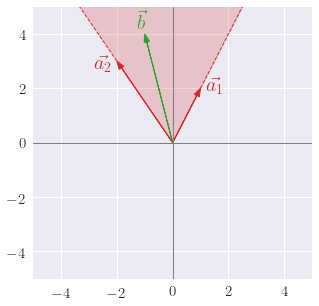

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = plot_cone(ax, b_x=-1, b_y=4)
savefig(fig, 'inside_cone.png')

Plot statement 2

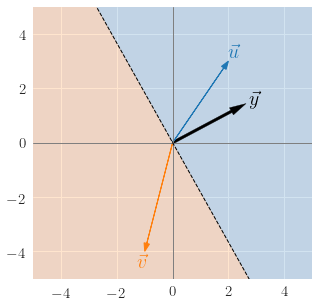

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot example vectors in each half plane
ax.arrow(0, 0, 2, 3, length_includes_head=True, linewidth=1, head_width=0.2, fc='tab:blue', ec='tab:blue')
ax.arrow(0, 0, -1, -4, length_includes_head=True, linewidth=1, head_width=0.2, fc='tab:orange', ec='tab:orange')
ax.axhline(0, color='tab:gray', lw=1)
ax.axvline(0, color='tab:gray', lw=1)

# Plot y vector in rectangular coordinates
angle = 0.5
y1 = 3*cos(angle)
y2 = 3*sin(angle)
y_arrow = plt.Arrow(0, 0, y1, y2, fc='black', ec='black', width=0.5)
ax.add_patch(y_arrow)

# Plot vector labels
ax.text(2.2, 3.3, r'$\vec{u}$', color='tab:blue', fontsize=20, ha='center', va='center')
ax.text(-1.1, -4.4, r'$\vec{v}$', color='tab:orange', fontsize=20, ha='center', va='center')
ax.text(y1*1.1, y2*1.1, r'$\vec{y}$', color='black', fontsize=20, ha='center', va='center')

# Plot half-plane in rectangular coordinates
ax.plot([10*cos(angle+pi/2), 10*cos(angle-pi/2)], [10*sin(angle+pi/2), 10*sin(angle-pi/2)], ls='--', lw='1', color='black')
ax.fill_between([-10, 10], [-10*tan(angle+pi/2), 10*tan(angle-pi/2)], [10, 10], color='tab:blue', alpha=0.2)
ax.fill_between([-10, 10], [-10*tan(angle+pi/2), 10*tan(angle-pi/2)], [-10, -10], color='tab:orange', alpha=0.2)

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
savefig(fig, 'half_planes.png')

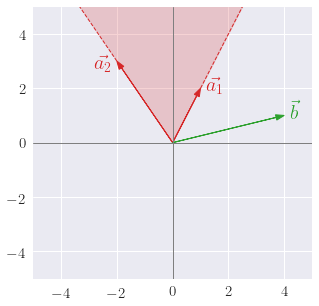

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = plot_cone(ax, b_x=4, b_y=1)
savefig(fig, 'outside_cone.png')

### Rotating-y animations

In [7]:
def update(i, fig, ax):
    # Reset half-plane shading
    ax.collections = [ax.collections[0]]
    
    # Reset dotted lines at half-plane boundary
    ax.lines = ax.lines[:4]
    
    # Reset arrow
    ax.patches = []
    
    # Reset labels (keep a1, a2, b, but reset y)
    ax.texts = ax.texts[:3]
    
    # Plot y vector in rectangular coordinates
    angle = angles[i]
    y1 = 3*cos(angle)
    y2 = 3*sin(angle)
    y_arrow = plt.Arrow(0, 0, y1, y2, fc='black', ec='black', width=0.5, zorder=20)
    ax.add_patch(y_arrow)
    
    # Plot half-plane in rectangular coordinates
    ax.plot([10*cos(angle+pi/2), 10*cos(angle-pi/2)], [10*sin(angle+pi/2), 10*sin(angle-pi/2)], ls='--', lw='1', color='tab:gray')
    ax.fill_between(x=[-10, 10], y1=[-10*tan(angle+pi/2), 10*tan(angle-pi/2)], y2=[10, 10], color='tab:blue', alpha=0.2)
    ax.fill_between(x=[-10, 10], y1=[-10*tan(angle+pi/2), 10*tan(angle-pi/2)], y2=[-10, -10], color='tab:orange', alpha=0.2)
    ax.text(y1*1.2, y2*1.2, r'$\vec{y}$', fontsize=20, ha='center', va='center')

Statement 1 only

In [8]:
# Angles that y vector will sweep. 
angles = np.linspace(atan2(3, -2)-pi/2, atan2(2, 1)+pi/2, 50)

# Add reverse angles for backward sweek.
angles = np.concatenate([angles, angles[::-1]]) 

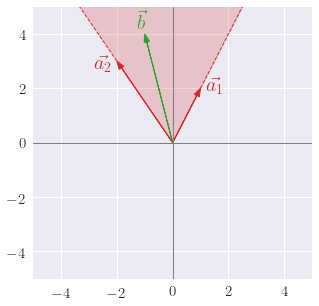

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = plot_cone(ax, b_x=-1, b_y=4)

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()

anim = FuncAnimation(fig, lambda i: update(i, fig, ax), 
                     frames=range(len(angles)), interval=50, repeat=True)
anim.save('../viz/anim_1.gif', writer='imagemagick')

Both statements

In [10]:
def update_both(i, fig, ax1, ax2):
    update(i, fig, ax1)
    update(i, fig, ax2)

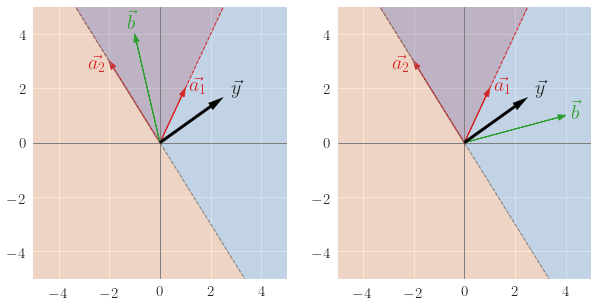

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1 = plot_cone(ax1, b_x=-1, b_y=4)
ax2 = plot_cone(ax2, b_x=4, b_y=1)

anim = FuncAnimation(fig, lambda i: update_both(i, fig, ax1, ax2), 
                     frames=range(len(angles)), interval=50, repeat=True)
anim.save('../viz/anim_both.gif', writer='imagemagick')